In [3]:
# Author: Brian Benbenek

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import json
import nltk
from collections import Counter
from wordcloud import WordCloud
from itertools import groupby, count

%matplotlib inline  

In [143]:
# Open Yahoo Public League summary data
with open('yahoo_leagues.txt') as json_file:
    league_dict = json.load(json_file)

In [144]:
df = pd.DataFrame.from_dict(league_dict['Public'], orient='index')

In [145]:
df.shape

(17339, 28)

In [146]:
df['name'] = df['name'].apply(lambda word: [word[3:]+", "+word[0:3] if (word[0:3]=='The' or word[0:3]=='THE') else word][0].strip())
names = df[~df['name'].str.contains('Yahoo Public|Yahoo Winner')]['name'].unique().tolist()

text_cloud = ' '.join([' '.join(name.split(' ')) for name in names])
text_cloud_count = Counter(text_cloud.split(" "))


In [147]:
text_cloud_count.most_common()

[('League', 1252),
 ('The', 692),
 ('Football', 667),
 ('Fantasy', 473),
 ('of', 311),
 ('2019', 262),
 ('NFL', 219),
 ('Dynasty', 208),
 ('the', 193),
 ('and', 143),
 ('League,', 127),
 ('league', 121),
 ('LEAGUE', 113),
 ('FFL', 109),
 ('2', 107),
 ('&', 97),
 ('Keeper', 95),
 ('THE', 92),
 ('Gridiron', 90),
 ('-', 80),
 ('FOOTBALL', 76),
 ('', 68),
 ('All', 68),
 ('Big', 61),
 ('PPR', 57),
 ('Season', 54),
 ('No', 49),
 ('FANTASY', 48),
 ('Bowl', 48),
 ('to', 47),
 ('A', 47),
 ('Game', 47),
 ('Family', 47),
 ('Year', 46),
 ('football', 46),
 ('Best', 44),
 ('Pigskin', 42),
 ('for', 41),
 ('Of', 41),
 ('FF', 41),
 ('II', 39),
 ('1', 38),
 ('Champions', 37),
 ('Fans', 37),
 ('3', 37),
 ('Super', 36),
 ('Legends', 36),
 ('Friends', 35),
 ('Elite', 34),
 ('Coast', 33),
 ('is', 33),
 ('or', 32),
 ('Ballers', 32),
 ('Real', 31),
 ('Time', 31),
 ('For', 30),
 ('4', 30),
 ('World', 30),
 ('Auction', 30),
 ('Fun', 29),
 ('Team', 29),
 ('Nation', 29),
 ('City', 28),
 ('19', 28),
 ('in', 28),


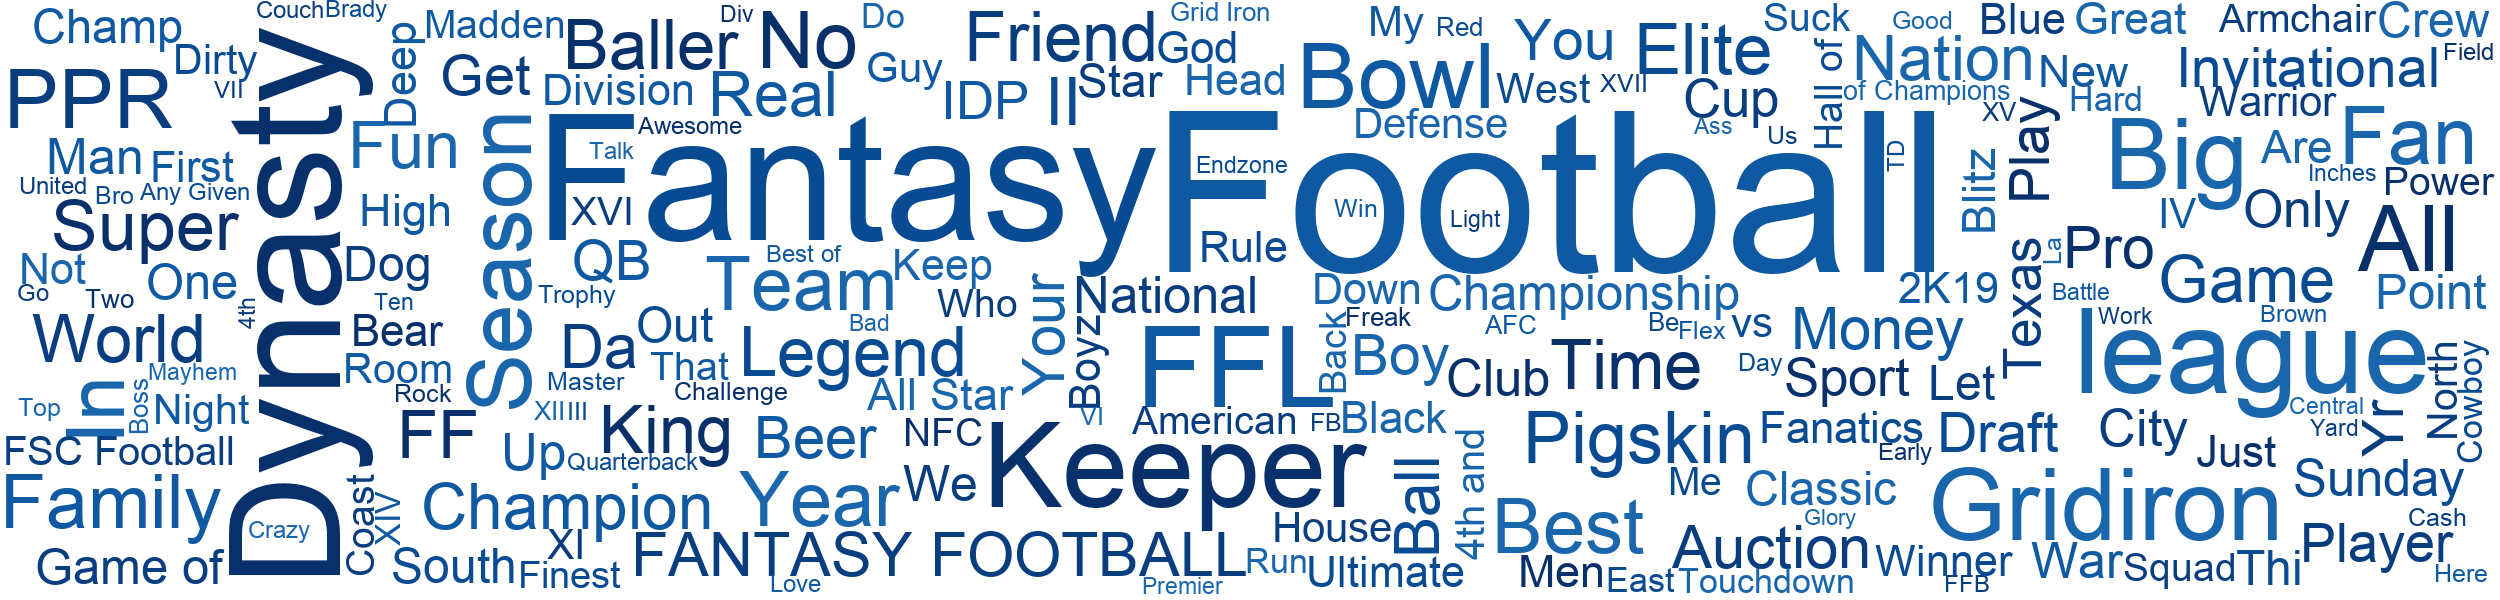

In [151]:
# Remove some of the generic of overly abundent words that take up too much realestate in the word cloud
remove_list = ['League', 'the', 'THE', 'the ', 'THE ', 'The',
               '2019', 'LEAGUE', 'NFL', 'Fantasy Football', '2018', 'It']
for word in remove_list:
    text_cloud = text_cloud.replace(word, "")

# Light colors are hard to see on a white background, so let's grab 
# all the dark colors from the "Blues" Matplotlib colormap, top 5 darkest colors.
cmap = matplotlib.cm.Blues(np.linspace(0,1,20))
cmap = matplotlib.colors.ListedColormap(cmap[15:,:-1])

# Create the wordcloud
WordCloud(width=2500, # Optimal size for Medium article
          height=600, 
          margin=0, 
          colormap=cmap,
          background_color='white',
          font_path='/Library/Fonts/Arial.ttf'
          #include_numbers=True,

         ).generate_from_text(text_cloud).to_image()

In [152]:
lst = league_dict['Does Not Exist']
c = count()
val = max((list(g) for _, g in groupby(lst, lambda x: x-next(c))), key=len)
print(val)
print(len(val))
print("Counter currently at:", league_dict['counter'])

[83675, 83676, 83677, 83678, 83679, 83680, 83681, 83682, 83683, 83684, 83685, 83686, 83687, 83688, 83689, 83690]
16
Counter currently at: 86884


In [153]:
# Get number of consecutive "Does Not Exist" League IDs
# Used to identify the end of the iterationm of leagues.
# Arbitrarily right now, if the consecutive "Does Not Exist" League IDs is 50 or more, 
#     then we've reached the end of the iterator.
val_all = [list(g) for _, g in groupby(lst, lambda x: x-next(c))]
Counter([len(val) for val in val_all])

Counter({1: 7894,
         2: 1326,
         4: 111,
         10: 2,
         9: 8,
         3: 373,
         5: 56,
         7: 13,
         6: 24,
         11: 1,
         12: 1,
         8: 3,
         13: 1,
         16: 1})